# Import and Config

In [22]:
import pandas as pd
import seaborn as sns
import ast

from matplotlib.pyplot import boxplot


# Load Data

In [46]:
df = pd.read_csv('../data/biored_raw.csv')
df

,instance_id,subreddit,post_id,sentence_id,post_title,text,annotated_labels,majority_labels,consensus_spans,num_annotators,span_level_agreement,group,auto_labels
0,104545801,offmychest,v502z3,0,Just ended my first relationship and I feel re...,I (22) ended my first relationship and feel gr...,"['[{""end"":6,""text"":""I (22)"",""start"":0,""labels""...",['per:age'],"[{'start': 0, 'end': 6, 'labels': ['per:age']}]",4,62.500000,group_0,age: information on age of a person;per: partn...
1,104545802,offmychest,yg091o,74,I had this idea of you,"And I have never known the love of my family, ...",[],['no_relation'],[],2,100.000000,group_0,per: parents: information on whether a person ...
2,104545803,offmychest,11zyznk,0,"I miss being a ""sex worker"" even though I'm in...","I , 23F , have been dating my boyfriend, 24M f...","['[{""end"":6,""text"":""I , 23"",""start"":0,""labels""...",['per:age'],"[{'start': 0, 'end': 6, 'labels': ['per:age']}]",5,50.238095,group_0,age: information on age of a person;sex or gen...
3,104545804,offmychest,xky3fc,1,everyone is losing love for me,The people in my life whom I owe to still bein...,"['[{""end"":79,""text"":""my mother and Girlfriend""...",['per: other family members'],"[{'start': 55, 'end': 79, 'labels': ['per: oth...",4,33.333333,group_0,per: children: information on whether a person...
4,104545805,offmychest,y0i42x,1,I absolutely HATE remote work,I live in a house with my boyfriend and two pe...,"['[{""end"":35,""text"":""my boyfriend"",""start"":23,...","['possessions', 'unclear / uncertain']","[{'start': 12, 'end': 17, 'labels': ['possessi...",3,2.777778,group_0,age: information on age of a person;per: child...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21475,108585405,Advice,ylp96d,9,Writing a resume as a new graduate?,Econometrics taught me valuable skills like ti...,"['[{""end"":39,""text"":""Econometrics taught me va...",['studies / education'],"[{'start': 0, 'end': 38, 'labels': ['studies /...",4,25.606713,group_5,studies / education: information on studies / ...
21476,108585407,Advice,xijdtc,4,Is it too late to change my career from scratc...,I'm 26 and will turn 27 in a few months... and...,"['[{""end"":90,""text"":""I\'m 26 and will turn 27 ...","['major life events', 'unclear / uncertain']",[],2,0.000000,group_5,age: information on age of a person;major life...
21477,108585408,Advice,11x514q,1,What should I do ?,"So backstory , im 19 and currently on my 2nd y...","['[{""end"":70,""text"":""im 19 and currently on my...",['studies / education'],"[{'start': 38, 'end': 70, 'labels': ['studies ...",4,67.831439,group_5,age: information on age of a person;studies / ...
21478,108585409,Advice,vnehh2,15,Im starting to hate my little sister's touch,I dont want her to grow up to resent me becaus...,"['[{""end"":76,""text"":""I refused to be a big sis...",['per: siblings'],"[{'start': 66, 'end': 76, 'labels': ['per: sib...",4,20.681063,group_5,per: siblings: information on whether a person...


# Exploration

In [24]:
df.shape

(21480, 13)

In [25]:
df.head()

,instance_id,subreddit,post_id,sentence_id,post_title,text,annotated_labels,majority_labels,consensus_spans,num_annotators,span_level_agreement,group,auto_labels
0,104545801,offmychest,v502z3,0,Just ended my first relationship and I feel re...,I (22) ended my first relationship and feel gr...,"['[{""end"":6,""text"":""I (22)"",""start"":0,""labels""...",['per:age'],"[{'start': 0, 'end': 6, 'labels': ['per:age']}]",4,62.500000,group_0,age: information on age of a person;per: partn...
1,104545802,offmychest,yg091o,74,I had this idea of you,"And I have never known the love of my family, ...",[],['no_relation'],[],2,100.000000,group_0,per: parents: information on whether a person ...
2,104545803,offmychest,11zyznk,0,"I miss being a ""sex worker"" even though I'm in...","I , 23F , have been dating my boyfriend, 24M f...","['[{""end"":6,""text"":""I , 23"",""start"":0,""labels""...",['per:age'],"[{'start': 0, 'end': 6, 'labels': ['per:age']}]",5,50.238095,group_0,age: information on age of a person;sex or gen...
3,104545804,offmychest,xky3fc,1,everyone is losing love for me,The people in my life whom I owe to still bein...,"['[{""end"":79,""text"":""my mother and Girlfriend""...",['per: other family members'],"[{'start': 55, 'end': 79, 'labels': ['per: oth...",4,33.333333,group_0,per: children: information on whether a person...
4,104545805,offmychest,y0i42x,1,I absolutely HATE remote work,I live in a house with my boyfriend and two pe...,"['[{""end"":35,""text"":""my boyfriend"",""start"":23,...","['possessions', 'unclear / uncertain']","[{'start': 12, 'end': 17, 'labels': ['possessi...",3,2.777778,group_0,age: information on age of a person;per: child...


In [27]:
df.describe()


,instance_id,sentence_id,num_annotators,span_level_agreement
count,2.148000e+04,21480.000000,21480.000000,19344.000000
mean,1.071876e+08,5.996229,3.314991,41.079882
std,1.423284e+06,11.600109,1.400132,31.393000
min,1.045458e+08,0.000000,0.000000,0.000000
25%,1.052732e+08,0.000000,2.000000,16.666667
50%,1.075074e+08,2.000000,3.000000,33.333333
75%,1.085770e+08,7.000000,4.000000,60.000000
max,1.085854e+08,216.000000,7.000000,100.000000


In [10]:
df.isnull().sum()

instance_id                0
subreddit                  0
post_id                    0
sentence_id                0
post_title              4222
text                       0
annotated_labels           0
majority_labels            0
consensus_spans            0
num_annotators             0
span_level_agreement    2136
group                      0
auto_labels             1330
dtype: int64

In [9]:
df['post_id'].nunique()

9635

In [15]:
df[['post_id', 'sentence_id']].drop_duplicates().shape[0]


10864

In [14]:
df['text'].nunique()
#TODO: check further

10760

<Axes: xlabel='sentence_id', ylabel='Count'>

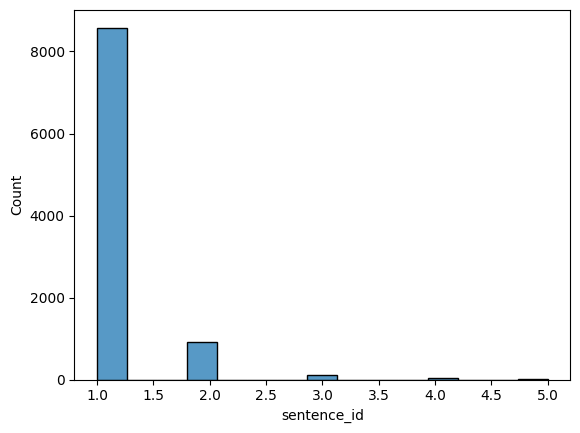

In [28]:
x = df.groupby('post_id').nunique()['sentence_id']
sns.histplot(x)

<Axes: xlabel='num_annotators', ylabel='Count'>

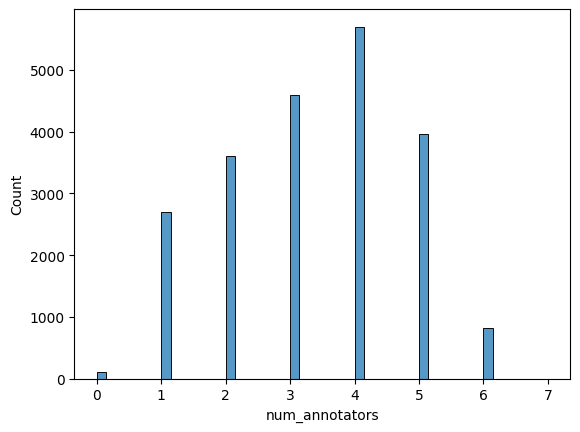

In [30]:
sns.histplot(df['num_annotators'])

In [45]:
import ast
import json

def parse_outer_list(cell):
    """Safely parse a string or list into a Python list (outer level)."""
    if isinstance(cell, list):
        return cell
    if not isinstance(cell, str) or not cell.strip():
        return []
    for parser in (ast.literal_eval, json.loads):
        try:
            return parser(cell)
        except Exception:
            continue
    return []

def parse_inner_json(entry):
    """Parse a single inner JSON string or list into a list of dicts."""
    if isinstance(entry, list):
        return entry
    if isinstance(entry, str):
        try:
            return json.loads(entry)
        except Exception:
            return []
    return []

def print_first_with_multiple_starts(df, col="annotated_labels"):
    """
    Find and print the first row where at least one annotation
    contains multiple 'start' indices.
    """
    for row_idx, cell in df[col].items():
        for ann_idx, inner in enumerate(parse_outer_list(cell)):
            spans = parse_inner_json(inner)
            starts = [d.get('start') for d in spans if isinstance(d, dict) and 'start' in d]
            if len(starts) > 1:
                print(f"First match in row {row_idx}, annotation {ann_idx}:\n")
                print("Original cell:")
                print(cell, "\n")
                print("Annotation with multiple 'start' values:")
                print(spans)
                return (row_idx, ann_idx, spans)
    print("No case with more than one 'start' found.")
    return None

print_first_with_multiple_starts(df, col="annotated_labels")

First match in row 0, annotation 2:

Original cell:
['[{"end":6,"text":"I (22)","start":0,"labels":["per:age"]}]', '[{"end":6,"text":"I (22)","start":0,"labels":["per:age"]}]', '[{"end":1,"text":"I","start":0,"labels":["per:age"]},{"end":5,"text":"22","start":3,"labels":["per:age"]}]', '[{"end":6,"text":"I (22)","start":0,"labels":["per:age"]}]'] 

Annotation with multiple 'start' values:
[{'end': 1, 'text': 'I', 'start': 0, 'labels': ['per:age']}, {'end': 5, 'text': '22', 'start': 3, 'labels': ['per:age']}]


(0,
 2,
 [{'end': 1, 'text': 'I', 'start': 0, 'labels': ['per:age']},
  {'end': 5, 'text': '22', 'start': 3, 'labels': ['per:age']}])

In [28]:
df.majority_labels

0                                         ['per:age']
1                                     ['no_relation']
2                                         ['per:age']
3                       ['per: other family members']
4              ['possessions', 'unclear / uncertain']
                             ...                     
21475                         ['studies / education']
21476    ['major life events', 'unclear / uncertain']
21477                         ['studies / education']
21478                               ['per: siblings']
21479                               ['per: siblings']
Name: majority_labels, Length: 21480, dtype: object

In [37]:
import re
def extract_labels(cell):
    if pd.isna(cell):
        return []
    text = str(cell)
    # finde alles zwischen einfachen Hochkommas '
    matches = re.findall(r"'([^']+)'", text)
    return matches if matches else [text.strip()]

# anwenden und zählen
labels_series = df['majority_labels'].apply(extract_labels).explode()
label_counts = labels_series.value_counts()
label_counts

majority_labels
no_relation                                                6096
per:age                                                    1600
family status                                              1450
unclear / uncertain                                        1447
relationship matters: romantic relationship matters        1268
feelings / emotions / moods                                1144
personality assessment: self-assessment                     990
per: sex or gender                                          874
job / occupation / other employment details                 855
major life events                                           791
per: friends                                                789
studies / education                                         763
per: parents                                                713
per: partner                                                644
wishes / desires / dreams / goals / plans                   615
medical condition / symp

In [40]:
(df['majority_labels']
 .apply(lambda x: 'no_relation' in str(x) and ',' in str(x))
 .any())

np.False_

In [60]:
counts_df = df['sentence_id'].value_counts().reset_index()
counts_df.columns = ['sentence_id', 'count']

counts_df #TODO check high sentence counts

,sentence_id,count
0,0,5783
1,1,3468
2,2,2179
3,3,1585
4,4,1128
...,...,...
101,80,1
102,140,1
103,139,1
104,64,1


In [61]:
counts_df = df['subreddit'].value_counts().reset_index()
counts_df.columns = ['subreddit', 'count']

counts_df #TODO u_Creepy-stories-life u_Various-Life-6763 and futher

,subreddit,count
0,rant,4340
1,AMA,3537
2,relationship_advice,3525
3,Life,3485
4,Advice,3408
5,offmychest,1703
6,jobs,775
7,college,685
8,u_Creepy-stories-life,7
9,u_Various-Life-6763,4


In [62]:
counts_df = df['post_title'].value_counts().reset_index()
counts_df.columns = ['post_title', 'count']

counts_df

,post_title,count
0,Stop writing cover letters.,36
1,Can I not be hired anywhere without an education?,36
2,Haven't been the same mentally and emotionally...,34
3,Ex-distance runner can now hardly run a 5k,34
4,What might a half sibling relationship be when...,34
...,...,...
7788,Funeral Expenses,1
7789,Job posted then taken down?,1
7790,Looking For Job Recommendations For My Prefere...,1
7791,"What is the point of marriage these days?? ""Ta...",1


In [63]:
counts_df = df['group'].value_counts().reset_index()
counts_df.columns = ['group', 'count']

counts_df

,group,count
0,group_1,3972
1,group_5,3598
2,group_3,3591
3,group_4,3550
4,group_0,3438
5,group_2,3331


In [65]:
import pandas as pd
import re

def extract_labels(cell):
    """Extract labels between single or double quotes like 'label' or "label"."""
    if pd.isna(cell):
        return []
    text = str(cell)
    matches = re.findall(r"'([^']+)'|\"([^\"]+)\"", text)
    # combine both capture groups
    return [a or b for a, b in matches]


#  expand each row so that each label becomes its own row
df_expanded = df.assign(label=df['majority_labels'].apply(extract_labels)).explode('label')

#  group by group + label and count occurrences
label_counts = (
    df_expanded
    .groupby(['group', 'label'])
    .size()
    .reset_index(name='count')
    .sort_values(['group', 'count'], ascending=[True, False])
)

label_counts
# groups and theirs assigned labels

,group,label,count
4,group_0,per:age,1600
2,group_0,no_relation,1153
3,group_0,per: other family members,417
1,group_0,habits,235
6,group_0,unclear / uncertain,200
0,group_0,appearance / physical characteristics,134
5,group_0,possessions,102
15,group_1,relationship matters: romantic relationship ma...,1268
8,group_1,feelings / emotions / moods,1144
11,group_1,per: partner,644


In [67]:
counts_df = df['num_annotators'].value_counts().reset_index()
counts_df.columns = ['num_annotators', 'count']

counts_df
#TODO check there should only be 3-4

,group,count
0,4,5699
1,3,4588
2,5,3965
3,2,3614
4,1,2695
5,6,814
6,0,103
7,7,2
